In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
def force(r1,r2,m1,m2):
    """
    Calculates the gravitational force on a mass m1 at position r1
    from a mass m2 at position r2
    
    Inputs
    r1        Position of the first mass
    r2        Position of the second mass
    m1        First mass
    m2        Second mass

    Returns
    f_on_m1   Force on m1 as a result of m2    
    """
    # Find r_12 and its magnitude
    r_12 = r2 - r1
    f_on_m1 = (G * m1 * m2)/(np.sqrt(r_12[0]**2 + r_12[1]**2))**3 * r_12
    return f_on_m1

In [38]:
G = 1
m1 = 1
m2 = 3e-6
m3 = 3.6e-8
Ndim = 2     #2D problem for now
Nsteps = 20000
dt = 0.01

r1 = np.zeros((Nsteps, Ndim))
r2 = np.zeros((Nsteps, Ndim))
r3 = np.zeros((Nsteps, Ndim))
v1 = np.zeros((Nsteps, Ndim))
v2 = np.zeros((Nsteps, Ndim))
v3 = np.zeros((Nsteps, Ndim))

# Initial conditions
r2[0] = np.array((1.0, 0))
r3[0] = np.array((1.0, 0.025)) 

v2[0] = np.array((0, np.sqrt(G*m1)))
v3[0] = np.array((-np.sqrt(G*m3/0.025), 0)) + v2[0]


In [39]:
for i in range(Nsteps-1):
    # Finding forces on masses at this timestep
    f2 = force(r2[i], r1[i], m2, m1) + force(r2[i], r3[i], m2, m3)
    f3 = force(r3[i], r2[i], m3, m2) + force(r3[i], r1[i], m3, m1)

    # Updating positions using velocity Verlet
    r2[i+1] = r2[i] + dt*v2[i] + (dt**2)*f2/(2*m2)
    r3[i+1] = r3[i] + dt*v3[i] + (dt**2)*f3/(2*m3)

    # Finding forces at new timestep 
    f2new = force(r2[i+1], r1[i+1], m2, m1) + force(r2[i+1], r3[i+1], m2, m3)
    f3new = force(r3[i+1], r2[i+1], m3, m2) + force(r3[i+1], r1[i+1], m3, m1)

    # Updating velocities using velocity Verlet
    v2[i+1] = v2[i] + dt*((f2+f2new) / (2*m2))
    v3[i+1] = v3[i] + dt*((f3+f3new) / (2*m3))



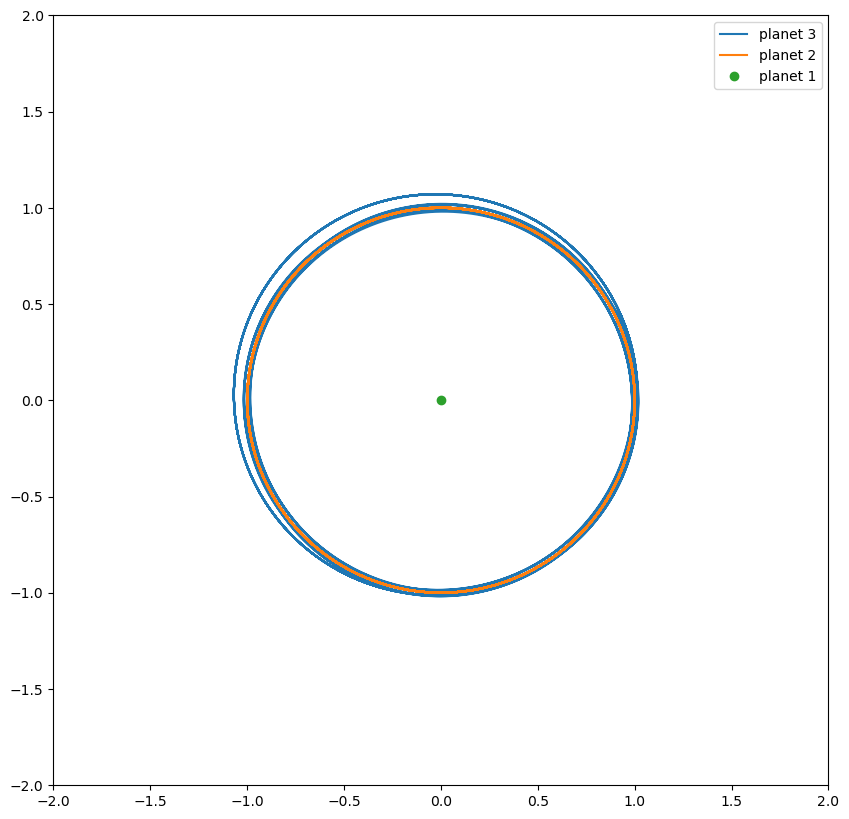

In [40]:
plt.figure(figsize=(10,10))
plt.plot(r3[:,0], r3[:,1], label='planet 3')
plt.plot(r2[:,0], r2[:,1], label='planet 2')
plt.plot(0, 0, 'o', label='planet 1')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.legend()


The initial conditions posed in the specification result in a slight deviation from a circular orbit of planet 3. With that said however, the orbit of planet 2 around 1 is a much better approximation of a circular orbit.

In [41]:
def RK4_solver(fun,y0,dt,N):
    """Solve dy/dt = fun(y,t) using fourth-order RK method.
    Inputs:
    fun  f(y,t)
    y0   Initial condition - assumed to be two-component
    dt   Step size
    N    Number of steps
    Returns: two arrays of length N+1 (x and v or equivalent)
    """
    # Storage for solution
    y = np.zeros((N+1,2))
    # Initial condition
    y[0] = y0
    t = 0
    for i in range(N):
        # RK4 formulae
        k1 = dt*fun(y[i],t)
        k2 = dt*fun(y[i]+0.5*k1,t+0.5*dt)
        k3 = dt*fun(y[i]+0.5*k2,t+0.5*dt)
        k4 = dt*fun(y[i]+k3,t+dt)
        y[i+1]=y[i]+(k1+2*k2+2*k3+k4)/6
        t += dt
    return y

def orbits_RHS(r,v,m):
    dx = v
    dv = (G * m)/np.linalg.norm(r)

    return dx, dv

In [42]:
def time_dilation(r1, r2, m1):
    r = np.linalg.norm(r1-r2)
    return np.sqrt(1 - 2*G*m1/(r*3*10**8))

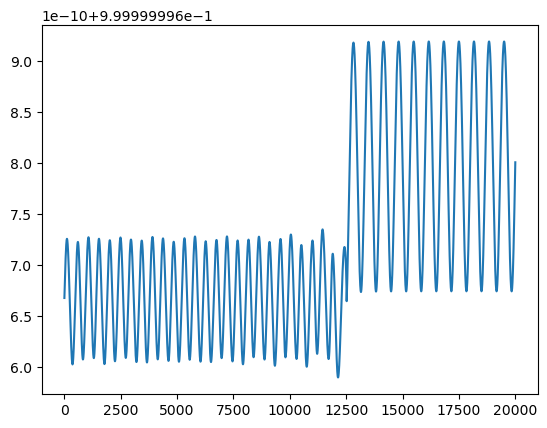

In [44]:
results = np.zeros(len(r1))

for i in range(len(r1)):
    results[i] = time_dilation(r1[i], r3[i], m1)

plt.plot(results)